In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

/Users/edilbekabdyrakhmanov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np


In [3]:
# Define the file paths
subdirectory = "/Users/edilbekabdyrakhmanov/Documents/GitHub/bakeryy/3_Model/Neural_Net_Edilbek/pickle_data_3"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Remove 'Datum' column if it exists
for feature_set in [training_features, validation_features, test_features]:
    if 'Datum' in feature_set.columns:
        feature_set.drop('Datum', axis=1, inplace=True)

# Verify the loaded data by printing their shapes and a few rows
print("Cleaned Training features dimensions:", training_features.shape)
print("Cleaned Validation features dimensions:", validation_features.shape)
print("Cleaned Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of cleaned training features:")
print(training_features.head())
print()
print("First few rows of training labels:")
print(training_labels.head())

Cleaned Training features dimensions: (7487, 24)
Cleaned Validation features dimensions: (1777, 24)
Cleaned Test features dimensions: (0, 24)

Loaded Training labels dimensions: (7487, 1)
Loaded Validation labels dimensions: (1777, 1)
Loaded Test labels dimensions: (0, 1)

First few rows of cleaned training features:
     Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
394               1                 0               0                 0   
395               1                 0               0                 0   
396               1                 0               0                 0   
397               1                 0               0                 0   
398               1                 0               0                 0   

     Weekday_Tuesday  Weekday_Wednesday  Warengruppe_Brötchen  \
394                0                  0                     0   
395                0                  0                     1   
396                0               

In [5]:
from sklearn.preprocessing import StandardScaler

# Ensure labels are numpy arrays
y_train = np.array(training_labels).reshape(-1,1)
y_val = np.array(validation_labels).reshape(-1,1)

# Scale
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train).flatten()
y_val_scaled = scaler_y.transform(y_val).flatten()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395 (1.54 KB)

 Trainable params: 347 (1.36 KB)

 Non-trainable params: 48 (192.00 B)

In [8]:

model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(
    training_features, y_train_scaled,
    validation_data=(validation_features, y_val_scaled),
    epochs=20
)

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 1.0204 - val_loss: 0.4665
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.5211 - val_loss: 0.3230
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.4025 - val_loss: 0.2365
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.2731 - val_loss: 0.2087
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.2575 - val_loss: 0.2035
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.2187 - val_loss: 0.2084
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.2139 - val_loss: 0.2117
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.2662 - val_loss: 0.1935
Epoch 9/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.2086 - val_loss: 0.1866
Epoch 10/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.1921 - val_loss: 0.1924
Epoch 11/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.2744 - val_loss: 0.1849
Epoch 12/20
234/234 ━━━━━━━━━━

In [10]:
y_pred_scaled = model.predict(validation_features)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


In [11]:
model.save("python_model.h5")

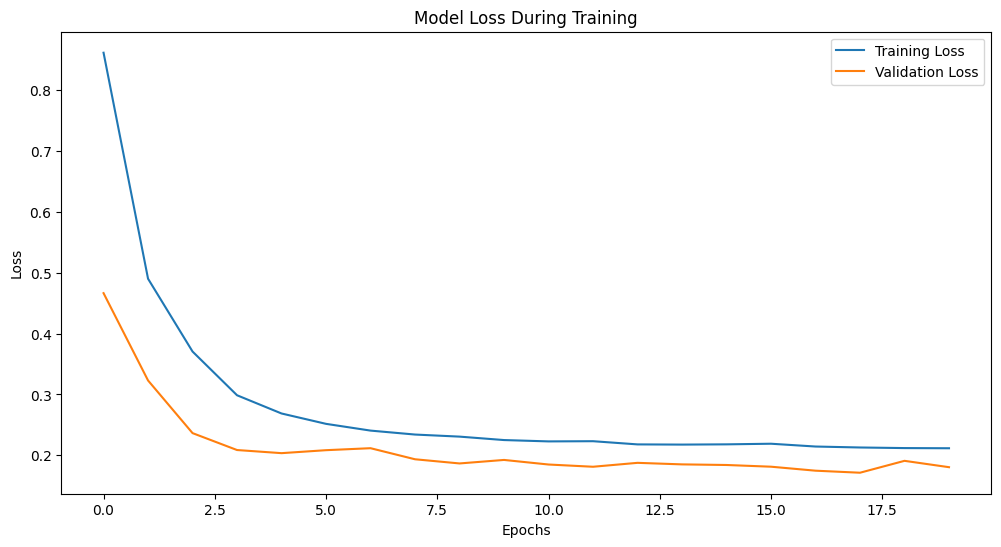

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
MAPE on the Training Data: 100.35%
MAPE on the Validation Data: 100.32%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


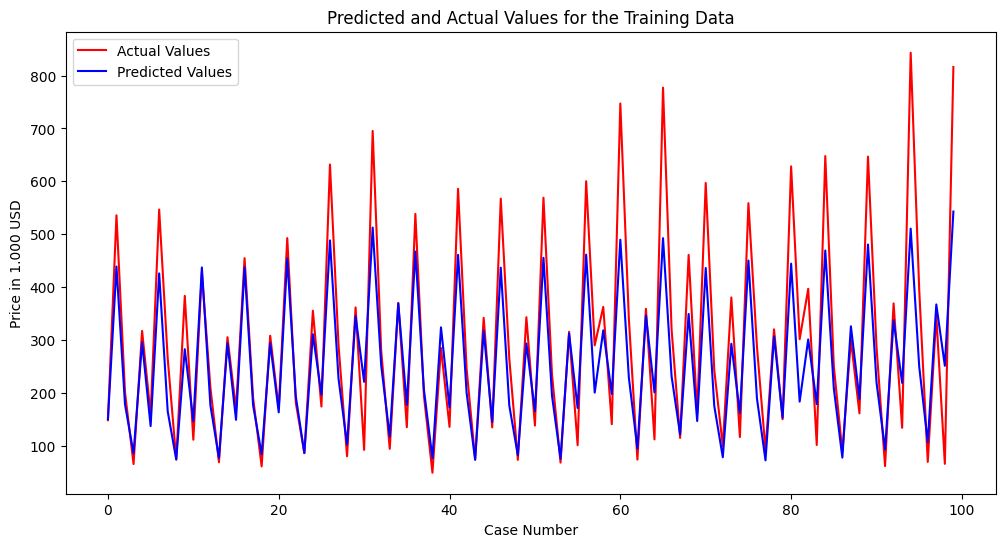

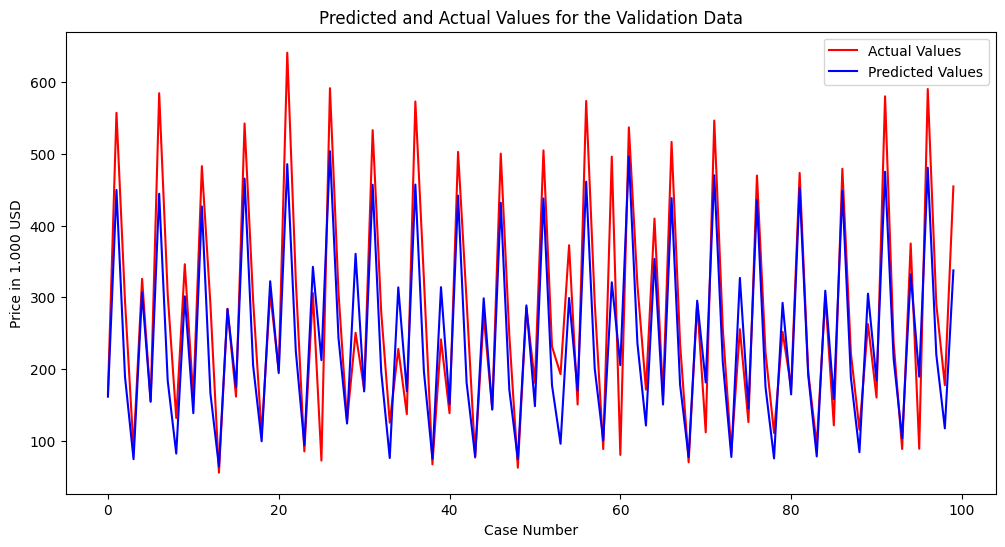

In [15]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')